# Nivel 1

## 1. 
Importar como DataFrame el archivo sprint10.xlsx. 

Asegúrese de que el archivo se importa correctamente, con los nombres de columna correspondientes, sin manipular el archivo original.


In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime 
from pandas.api.types import is_numeric_dtype, is_datetime64_any_dtype, is_bool_dtype

In [8]:
# Importar como DataFrame el archivo sprint10.xlsx. 
df = pd.read_excel(r"C:\Users\GCCM_\OneDrive\Desktop\Bootcamp\sprint10.xlsx", header=3)

# Ordenar el DataFrame por el país de origen. En caso de empate, ordena por el nombre de la ciudad.
df = df.sort_values(by=["País d'origen","Ciutat"])

# Muestra las primeras 10 filas.
primeras_filas = df.head(10)
primeras_filas


,Unnamed: 0,Nom,Cognoms,DNI,País d'origen,Ciutat,Dia de Naixement,Mes de Naixement,Any de Naixement,Gènere,Salari mensual,Fills,No Fills,Grup Professional
21,21,Mia,Schneider Fischer,28973553Z,Alemanya,Berlín,22,10,1976,A,951 €,NaN,1.0,Grup A
154,154,Laura,Schneider Fischer,37399141L,Alemanya,Berlín,2,2,1958,D,1.769 €,1.0,NaN,Grup B
224,224,Lea,Schneider Schneider,37368317L,Alemanya,Berlín,23,10,2005,D,2.013 €,NaN,1.0,Grup B
278,278,Mia,Fischer,21390098Z,Alemanya,Berlín,11,8,1950,D,1.557 €,1.0,NaN,Grup B
602,602,Jonas,Schneider,44060014R,Alemanya,Berlín,22,11,1985,H,2.754 €,1.0,NaN,Grup D
871,871,Lea,Fischer,14773153R,Alemanya,Berlín,9,9,1986,D,1.370 €,1.0,NaN,Grup A
281,281,Lea,Müller,23266650S,Alemanya,Hamburg,14,4,2003,D,1.314 €,NaN,1.0,Grup A
435,435,Anna,Müller,83274277X,Alemanya,Hamburg,1,1,1987,D,2.464 €,NaN,1.0,Grup C
444,444,Laura,Schmidt Müller,60161784X,Alemanya,Hamburg,15,6,1987,NC,2.035 €,1.0,NaN,Grup C
487,487,Lukas,Müller Fischer,60982309S,Alemanya,Hamburg,28,3,1971,H,2.042 €,NaN,1.0,Grup B


In [3]:
# print donde compruebe que el DNI solo tiene valores únicos.
print(df['DNI'].is_unique)

True


# 2.

In [9]:
# Crear una columna que sea el nombre completo.
df['Nom i Cognoms'] = df['Nom'].str.cat(df['Cognoms'],sep=' ')
df = df.drop(['Nom','Cognoms'],axis=1)

# Crear una columna si la persona es nacida en España o no.
df['Nascut a Espanya'] = df["País d'origen"].apply(lambda valor: 'Si' if valor == 'Espanya' else 'No')

# Ponga el DNI como índice del DataFrame (nombres de fila).
df = df.set_index('DNI')

# Reemplace el nombre de las columnas día de nacimiento, el mes de nacimiento y año de nacimiento por día, mes y año.
df.rename(columns = {'Dia de Naixement':'Dia','Mes de Naixement':'Mes','Any de Naixement':'Any'},inplace=True)

# Reemplaza a H por Hombres, D por Mujer, A por Otros y NC por un dato faltante (nan/null/na).
df['Gènere'].replace({
    'H':'Home',
    'D':'Dona',
    'A':'Altres',
    'NC':None
}, inplace=True)

#Muestra todos los cambios que has realizado en una sola tabla.
df

,Unnamed: 0,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Fills,No Fills,Grup Professional,Nom i Cognoms,Nascut a Espanya
DNI,,,,,,,,,,,,,
28973553Z,21,Alemanya,Berlín,22,10,1976,Altres,951 €,NaN,1.0,Grup A,Mia Schneider Fischer,No
37399141L,154,Alemanya,Berlín,2,2,1958,Dona,1.769 €,1.0,NaN,Grup B,Laura Schneider Fischer,No
37368317L,224,Alemanya,Berlín,23,10,2005,Dona,2.013 €,NaN,1.0,Grup B,Lea Schneider Schneider,No
21390098Z,278,Alemanya,Berlín,11,8,1950,Dona,1.557 €,1.0,NaN,Grup B,Mia Fischer,No
44060014R,602,Alemanya,Berlín,22,11,1985,Home,2.754 €,1.0,NaN,Grup D,Jonas Schneider,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,547,Regne Unit,Manchester,28,3,1958,Dona,2.033 €,NaN,1.0,Grup B,Emily Taylor Jones,No
57441590Y,728,Regne Unit,Manchester,27,12,1979,Home,1.130 €,1.0,NaN,Grup A,George Brown Jones,No
58204038A,751,Regne Unit,Manchester,28,8,1952,Altres,1.023 €,NaN,1.0,Grup A,Olivia Brown Brown,No


# 3.
Junta las columnas Hijos y No Hijos en una sola columna, utilizando el método .apply() y definiendo una función que resuelva el problema.

La columna nueva debe llamarse "Hijos" y tomar los valores "Sí" o "No".

In [10]:
def te_fills(fila):
    return 'SI' if fila['Fills'] == 1 else 'NO'

df['Fills_nou'] = df.apply(te_fills, axis=1)

df = df.drop(['Fills', 'No Fills'], axis=1)

df = df.rename(columns={'Fills_nou': 'Fills'})

df

,Unnamed: 0,País d'origen,Ciutat,Dia,Mes,Any,Gènere,Salari mensual,Grup Professional,Nom i Cognoms,Nascut a Espanya,Fills
DNI,,,,,,,,,,,,
28973553Z,21,Alemanya,Berlín,22,10,1976,Altres,951 €,Grup A,Mia Schneider Fischer,No,NO
37399141L,154,Alemanya,Berlín,2,2,1958,Dona,1.769 €,Grup B,Laura Schneider Fischer,No,SI
37368317L,224,Alemanya,Berlín,23,10,2005,Dona,2.013 €,Grup B,Lea Schneider Schneider,No,NO
21390098Z,278,Alemanya,Berlín,11,8,1950,Dona,1.557 €,Grup B,Mia Fischer,No,SI
44060014R,602,Alemanya,Berlín,22,11,1985,Home,2.754 €,Grup D,Jonas Schneider,No,SI
...,...,...,...,...,...,...,...,...,...,...,...,...
89577876S,547,Regne Unit,Manchester,28,3,1958,Dona,2.033 €,Grup B,Emily Taylor Jones,No,NO
57441590Y,728,Regne Unit,Manchester,27,12,1979,Home,1.130 €,Grup A,George Brown Jones,No,SI
58204038A,751,Regne Unit,Manchester,28,8,1952,Altres,1.023 €,Grup A,Olivia Brown Brown,No,NO


# 4.

In [11]:
# Limpieza y conversion de Salari mensual 
df['Salari mensual'] = df['Salari mensual'].str.replace('€',' ').str.replace('.','')
df['Salari mensual'] = pd.to_numeric(df['Salari mensual'])

# Crea una tabla resumen que permita ver el sueldo medio, media, mínimo y máximo por Género.
sueldo = df.groupby('Gènere')['Salari mensual'].aggregate(['mean','median','min','max'])
sueldo = sueldo.rename(columns={ 'mean': 'Sou mig', 'median': 'Medià', 'min': 'Mínim', 'max': 'Màxim' })
sueldo  = sueldo.round(2)
# Ordena la tabla en función del sueldo medio.
sueldo.sort_values(by=["Sou mig"])

,Sou mig,Medià,Mínim,Màxim
Gènere,,,,
Dona,1469.44,1361.5,665,3021
Altres,1626.59,1545.0,703,3175
Home,1643.25,1531.0,737,3356


# 5.
Crea una tabla resumen con el salario medio por género (filas) y país de origen (columnas).

Añade las medias a los márgenes de la tabla.

(EXTRA): Aplica formato condicional en la tabla para ver en un color más intenso los valores más elevados

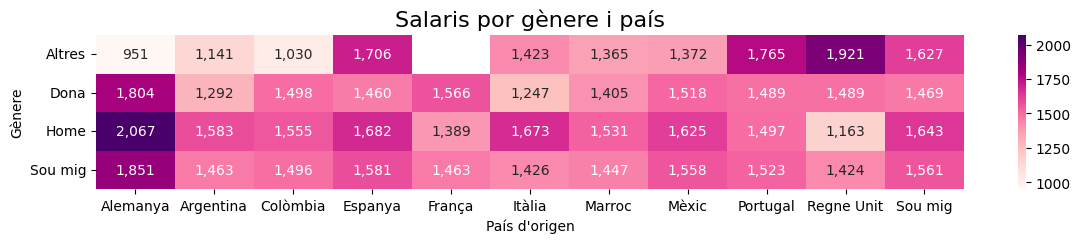

In [12]:
resumen = df.pivot_table(
    index= 'Gènere',
    columns="País d'origen",
    values='Salari mensual',
    aggfunc='mean',
    margins=True,
    margins_name='Sou mig'
    ).round(2)

# resumen.style.formatbackground_gradient(cmap="Blues")
# resumen.style.background_gradient(cmap="Blues")
plt.figure(figsize=(14,2)) 
sns.heatmap(resumen, annot=True, cmap="RdPu",fmt=",.0f") 
plt.title("Salaris por gènere i país", fontsize=16)
plt.show()


# 6.

Crea una nueva columna que sea la fecha de nacimiento en formato Datetime a partir de las columnas día, mes y año. Utilizando esta columna crea una función que dada una fecha, te calcule la edad actual a día de hoy.

Utiliza la función que acabas de crear para generar una columna nueva en DataFrame con la edad actual.

In [13]:
df['Data de naixement'] = pd.to_datetime(
    {
        'year': df['Any'],
        'month': df['Mes'],
        'day': df['Dia']
    }
)
df = df.drop(['Any','Mes','Dia'],axis=1)

def edat_actual(data):
    avui = datetime.today() 
    edat = avui.year - data.year
    if (avui.month < data.month) or (avui.month == data.month and avui.day < data.day):
        edat -= 1
    return edat

df['Edat actual'] = df['Data de naixement'].apply(edat_actual)
df

,Unnamed: 0,País d'origen,Ciutat,Gènere,Salari mensual,Grup Professional,Nom i Cognoms,Nascut a Espanya,Fills,Data de naixement,Edat actual
DNI,,,,,,,,,,,
28973553Z,21,Alemanya,Berlín,Altres,951,Grup A,Mia Schneider Fischer,No,NO,1976-10-22,49
37399141L,154,Alemanya,Berlín,Dona,1769,Grup B,Laura Schneider Fischer,No,SI,1958-02-02,68
37368317L,224,Alemanya,Berlín,Dona,2013,Grup B,Lea Schneider Schneider,No,NO,2005-10-23,20
21390098Z,278,Alemanya,Berlín,Dona,1557,Grup B,Mia Fischer,No,SI,1950-08-11,75
44060014R,602,Alemanya,Berlín,Home,2754,Grup D,Jonas Schneider,No,SI,1985-11-22,40
...,...,...,...,...,...,...,...,...,...,...,...
89577876S,547,Regne Unit,Manchester,Dona,2033,Grup B,Emily Taylor Jones,No,NO,1958-03-28,67
57441590Y,728,Regne Unit,Manchester,Home,1130,Grup A,George Brown Jones,No,SI,1979-12-27,46
58204038A,751,Regne Unit,Manchester,Altres,1023,Grup A,Olivia Brown Brown,No,NO,1952-08-28,73


# Nivel 2

## 1. 
Utilizando el siguiente DataFrame, adjunta la columna "Incremento" al dataframe del nivel anterior.

Actualiza la columna salario en función de los porcentajes que se adjuntan. No modifiques manualmente los incrementos, escribe código Python para realizar las conversiones necesarias.

In [14]:
df_increment = pd.DataFrame({"Grup":["Grup A","Grup B","Grup C", "Grup D" ] , "Increment": ["5%","3,5%","2%","8%"]})
df_increment

,Grup,Increment
0,Grup A,5%
1,Grup B,"3,5%"
2,Grup C,2%
3,Grup D,8%


In [15]:
# adjuntar la columna "Increment" al dataframe del nivel anterior
df = df.merge(df_increment, left_on="Grup Professional", right_on="Grup")
df = df.drop(columns=["Grup"])
df["Increment"] = df["Increment"].str.replace("%", "")
df["Increment"] = df["Increment"].str.replace(",", ".")
df["Increment"] = df["Increment"].astype(float) / 100

# Actualiza la columna salario en función de los porcentajes que se adjuntan. 
df["Salari actualitzat"] = round(df["Salari mensual"] * (1 + df["Increment"]),2)
df 

,Unnamed: 0,País d'origen,Ciutat,Gènere,Salari mensual,Grup Professional,Nom i Cognoms,Nascut a Espanya,Fills,Data de naixement,Edat actual,Increment,Salari actualitzat
0,21,Alemanya,Berlín,Altres,951,Grup A,Mia Schneider Fischer,No,NO,1976-10-22,49,0.050,998.55
1,154,Alemanya,Berlín,Dona,1769,Grup B,Laura Schneider Fischer,No,SI,1958-02-02,68,0.035,1830.92
2,224,Alemanya,Berlín,Dona,2013,Grup B,Lea Schneider Schneider,No,NO,2005-10-23,20,0.035,2083.46
3,278,Alemanya,Berlín,Dona,1557,Grup B,Mia Fischer,No,SI,1950-08-11,75,0.035,1611.50
4,602,Alemanya,Berlín,Home,2754,Grup D,Jonas Schneider,No,SI,1985-11-22,40,0.080,2974.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,547,Regne Unit,Manchester,Dona,2033,Grup B,Emily Taylor Jones,No,NO,1958-03-28,67,0.035,2104.15
996,728,Regne Unit,Manchester,Home,1130,Grup A,George Brown Jones,No,SI,1979-12-27,46,0.050,1186.50
997,751,Regne Unit,Manchester,Altres,1023,Grup A,Olivia Brown Brown,No,NO,1952-08-28,73,0.050,1074.15
998,854,Regne Unit,Manchester,Dona,1197,Grup A,Isla Jones Brown,No,NO,1999-03-28,26,0.050,1256.85


# 2.

Utilizando un bucle, exporta en 4 archivos (formato .xlsx o .csv) los datos de cada Grupo Profesional.

Por ejemplo: "datos_GrupA.xlsx" , "datos_GrupB.xlsx" ...

Exporta un 5º DataFrame en formato .xlsx o .csv que contenga cuántos trabajadores hay por cada Grupo Profesional, cuál es su sueldo medio y cuál es su edad media.

In [16]:
# Lista de grupos profesionales únicos 
grups = df['Grup Professional'].unique()

# Recorro cada grupo profesional para generar un archivo por separado
for grup in grups:
    # Filtro el DataFrame para quedarme solo con los trabajadores del grupo actual
    df_group = df[df["Grup Professional"] == grup]
    
    # Construyo el nombre del archivo de salida usando el nombre del grupo
    fichero = fr"C:\Users\GCCM_\Downloads\datos_{grup}.csv"
    
    # Exporto el DataFrame filtrado a un archivo CSV
    df_group.to_csv(fichero, sep=";", index=True)

# Agrupo el DataFrame original por grupo profesional y calculos
df_resumen = df.groupby('Grup Professional').agg({
    'Nom i Cognoms':'count',
    'Salari mensual':'mean',
    'Edat actual': 'mean'
})

# Exporto el DataFrame resumen a un archivo CSV
df_resumen.to_csv(r"C:\Users\GCCM_\Downloads\resumen_grupos.csv", sep=";", index=True)



# Nivel 3

## 1.

Crea una función que tome un dataframe como parámetro de entrada.

La función debe crear (y exportar) un gráfico automáticamente para cada columna del dataframe. Por ejemplo:
    un histograma/boxplot si la variable es numérica
    unas barras de los valores más frecuentes si es categórica
    unas barras de los años más frecuentes si el dato está en formato fecha.

La idea es crear una función que funcione por cualquier dataframe, no sólo con lo que hemos trabajado hasta ahora.

Muestra el resultado de la función en alguno de los datasets de ejemplo que contiene el paquete seaborn. Por ejemplo, iris, penguins o titanic.

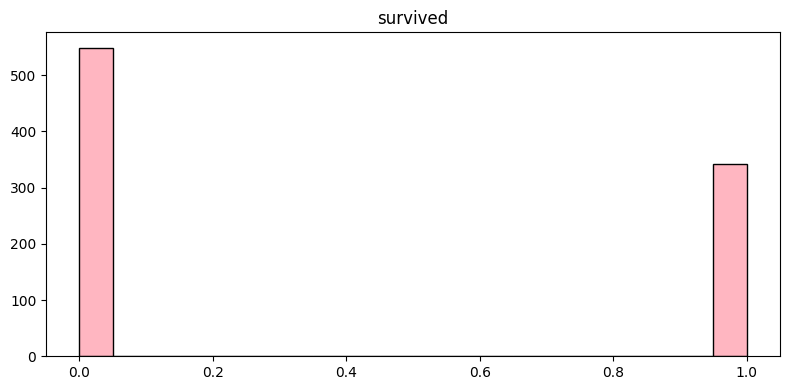

<Figure size 640x480 with 0 Axes>

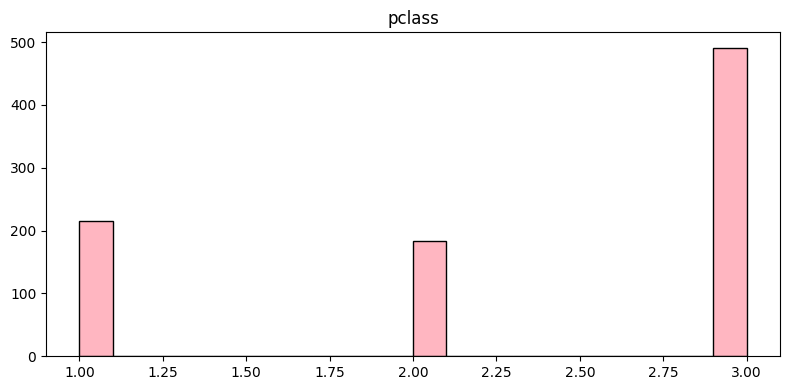

<Figure size 640x480 with 0 Axes>

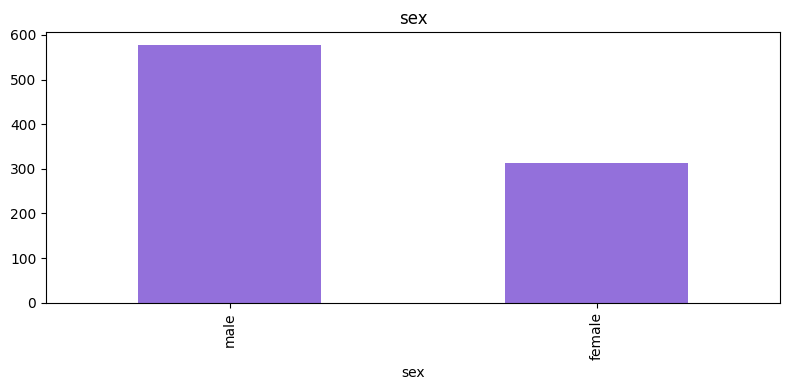

<Figure size 640x480 with 0 Axes>

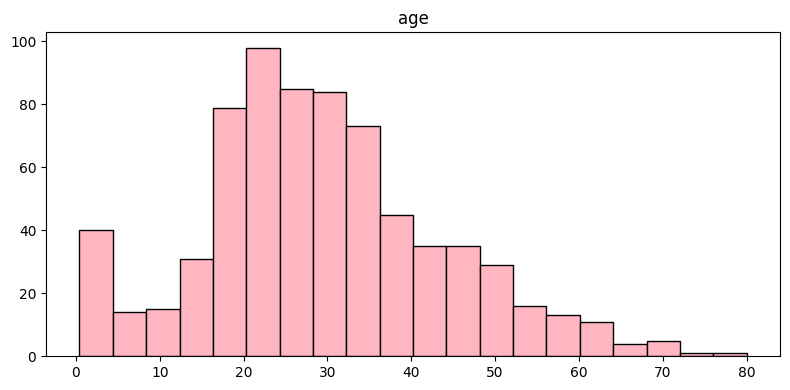

<Figure size 640x480 with 0 Axes>

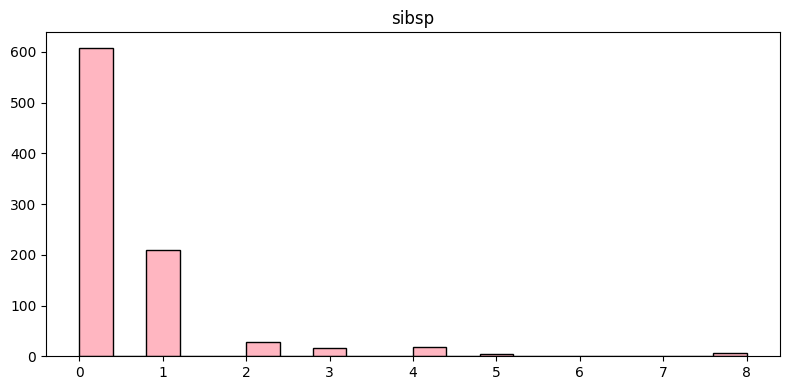

<Figure size 640x480 with 0 Axes>

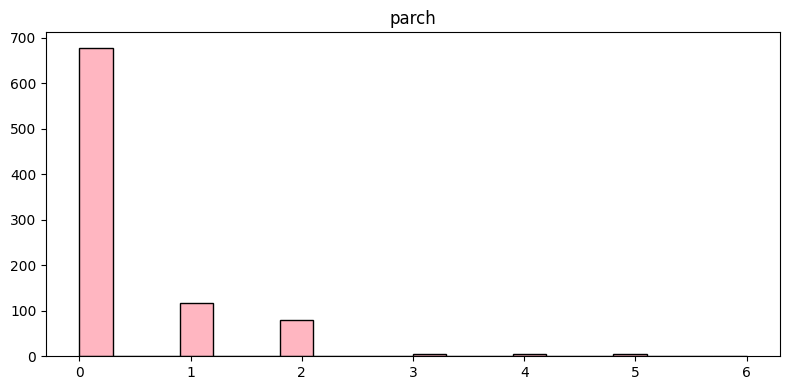

<Figure size 640x480 with 0 Axes>

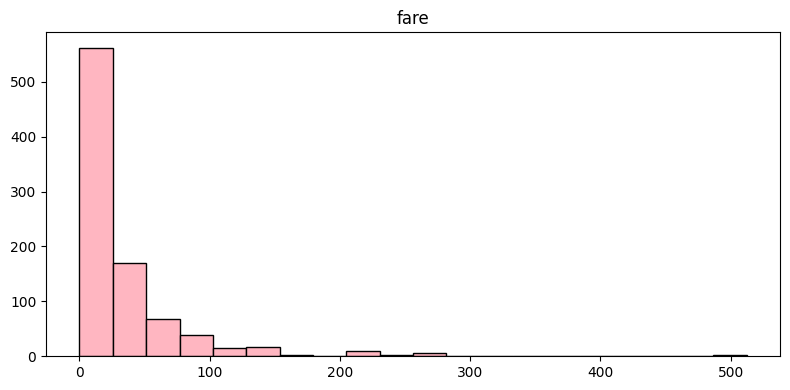

<Figure size 640x480 with 0 Axes>

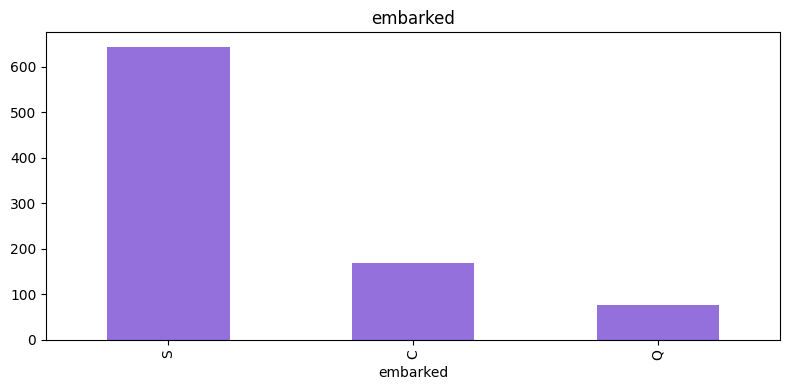

<Figure size 640x480 with 0 Axes>

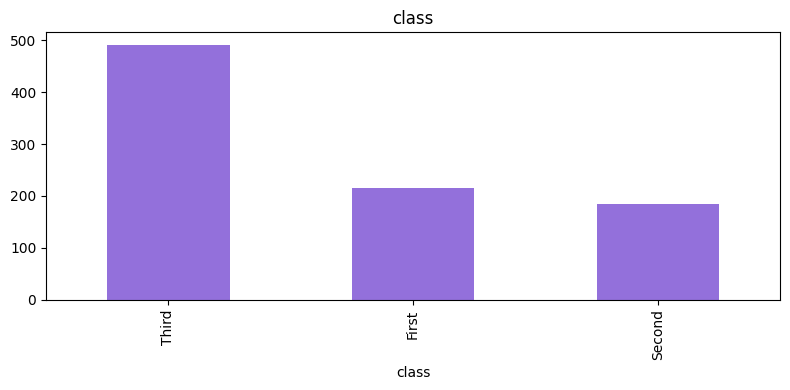

<Figure size 640x480 with 0 Axes>

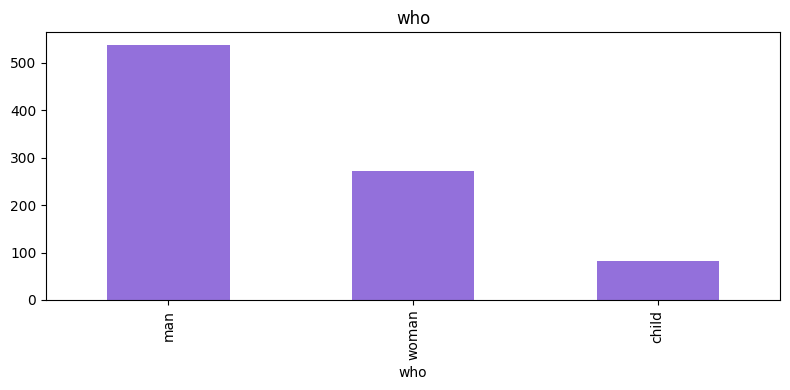

<Figure size 640x480 with 0 Axes>

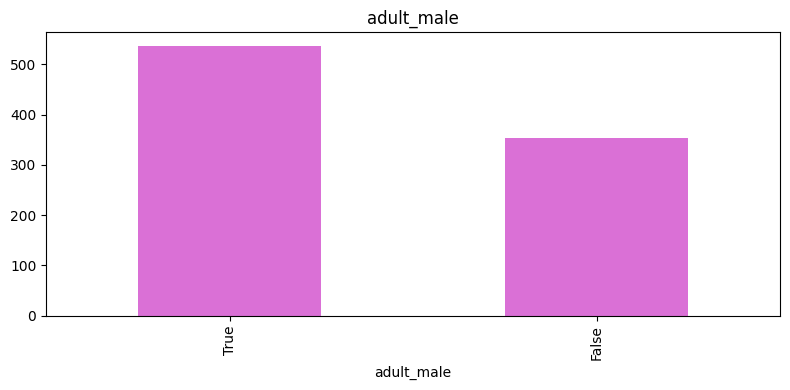

<Figure size 640x480 with 0 Axes>

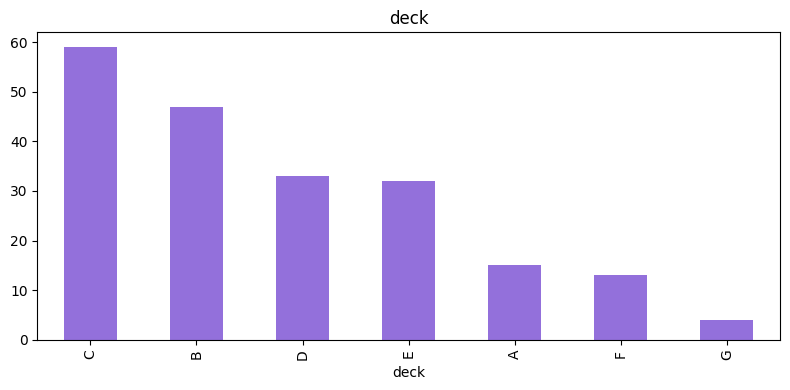

<Figure size 640x480 with 0 Axes>

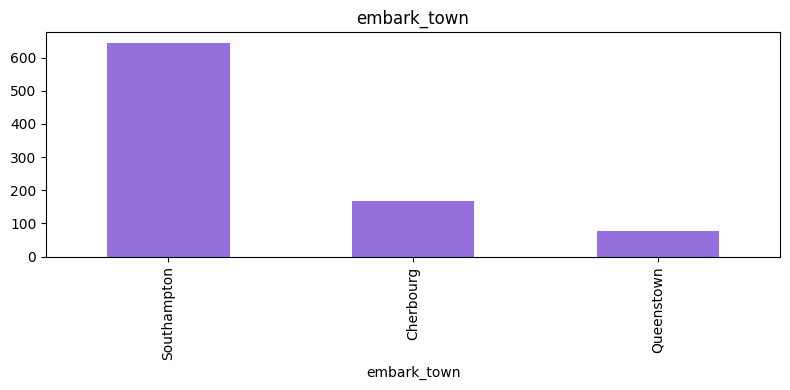

<Figure size 640x480 with 0 Axes>

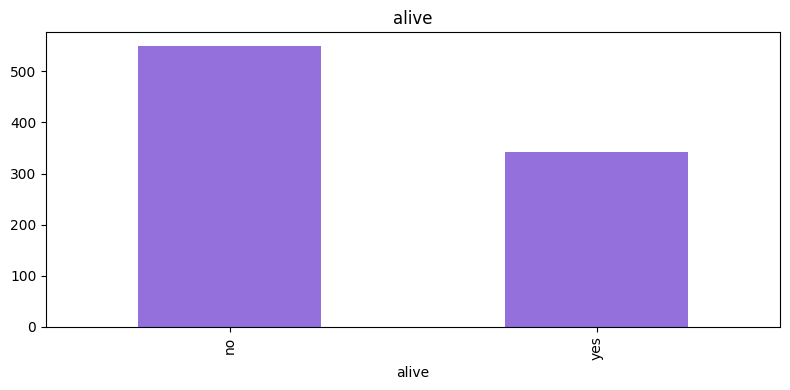

<Figure size 640x480 with 0 Axes>

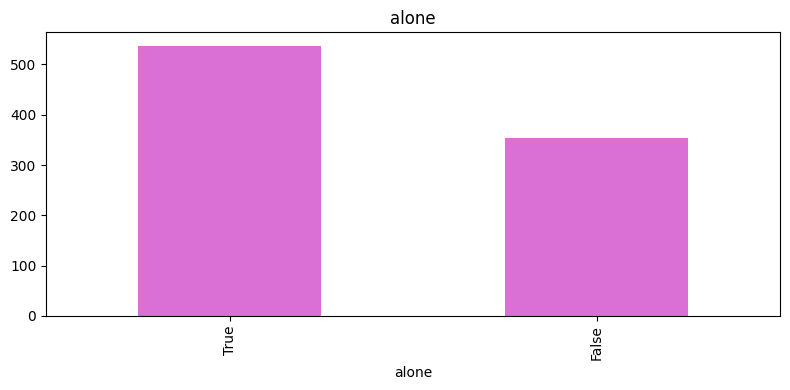

<Figure size 640x480 with 0 Axes>

In [17]:
def graficos(data):
    for col in data.columns:
        
        # NUMÉRICAS (pero NO booleanas)
        if is_numeric_dtype(data[col]) and not is_bool_dtype(data[col]):
            plt.figure(figsize=(8,4))
            plt.hist(data[col], bins=20, color="lightpink", edgecolor="black")
            plt.title(col)
            plt.tight_layout()
            plt.savefig("graficos/" + col + ".png")
            plt.show()
            plt.clf()

        # FECHAS
        elif is_datetime64_any_dtype(data[col]):
            plt.figure(figsize=(8,4))
            data[col].dt.year.value_counts().plot.bar(color="green")
            plt.title(col)
            plt.tight_layout()
            plt.savefig("graficos/" + col + ".png")
            plt.show()
            plt.clf()

        # BOOLEANAS (Se tratan como categóricas)
        elif is_bool_dtype(data[col]):
            plt.figure(figsize=(8,4))
            data[col].value_counts().plot.bar(color="orchid")
            plt.title(col)
            plt.tight_layout()
            plt.savefig("graficos/" + col + ".png")
            plt.show()
            plt.clf()

        # CATEGÓRICAS
        else:
            plt.figure(figsize=(8,4))
            data[col].value_counts().plot.bar(color="mediumpurple")
            plt.title(col)
            plt.tight_layout()
            plt.savefig("graficos/" + col + ".png")
            plt.show()
            plt.clf()
df2 = sns.load_dataset("titanic") 
graficos(df2)

2.

Carga el archivo matriz_distancies.xlsx en pandas, de modo que los nombres de filas y los nombres de columnas sean los de las ciudades. Borra "Las Palmas de Gran Canaria" y "Palma" para que podamos realizar el trayecto en coche.

Fuente: Mejoras Rutas

Nos interesa visitar todas las principales ciudades de España recorriendo la mínima distancia posible.

No hace falta que lo hagas de forma óptima, nos interesa que desarrolles una solución razonable utilizando las herramientas que tienes actualmente.

Por ejemplo, una aproximación sencilla (que no óptima) sería yendo siempre a la ciudad más cercana que no hayamos visitado todavía

Haz una función que dada la matriz de distancias y la ciudad de origen, haga una propuesta de ruta que sea lo más corta posible que puedas, devolviendo una lista con el orden de visita. Da también la distancia total recorrida.

(EXTRA) Desde qué ciudad la ruta sería más corta con el algoritmo planteado

In [4]:
distancias = pd.read_excel(r"C:\Users\GCCM_\OneDrive\Desktop\Bootcamp\matriu_distancies.xlsx", index_col=0)
distancias

,Barcelona,Valencia,Sevilla,Zaragoza,Málaga,Murcia,Palma,Las Palmas de Gran Canaria,Bilbao,Alicante,Córdoba,Valladolid,Vigo,Gijón,Hospitalet de Llobregat
Barcelona,NaN,303.0,831.0,256.0,770.0,471.0,206.0,2175.0,469.0,407.0,711.0,576.0,908.0,686.0,7.0
Valencia,303.0,NaN,541.0,246.0,468.0,177.0,260.0,1874.0,473.0,125.0,421.0,441.0,766.0,632.0,297.0
Sevilla,831.0,541.0,NaN,646.0,158.0,433.0,791.0,1355.0,703.0,495.0,121.0,486.0,588.0,685.0,824.0
Zaragoza,256.0,246.0,646.0,NaN,628.0,408.0,377.0,2001.0,246.0,368.0,535.0,320.0,652.0,444.0,250.0
Málaga,770.0,468.0,158.0,628.0,NaN,323.0,695.0,1406.0,739.0,391.0,133.0,549.0,716.0,766.0,763.0
Murcia,471.0,177.0,433.0,408.0,323.0,NaN,372.0,1723.0,606.0,69.0,320.0,510.0,800.0,726.0,465.0
Palma,206.0,260.0,791.0,377.0,695.0,372.0,NaN,2093.0,621.0,303.0,671.0,664.0,1000.0,820.0,204.0
Las Palmas de Gran Canaria,2175.0,1874.0,1355.0,2001.0,1406.0,1723.0,2093.0,NaN,2022.0,1792.0,1470.0,1790.0,1682.0,1925.0,2168.0
Bilbao,469.0,473.0,703.0,246.0,739.0,606.0,621.0,2022.0,NaN,583.0,618.0,232.0,486.0,223.0,465.0
Alicante,407.0,125.0,495.0,368.0,391.0,69.0,303.0,1792.0,583.0,NaN,379.0,515.0,821.0,722.0,401.0


In [5]:
ciudades = ['Palma', 'Las Palmas de Gran Canaria']
distancias = distancias.drop(index=ciudades, columns=ciudades, errors='ignore')
distancias

,Barcelona,Valencia,Sevilla,Zaragoza,Málaga,Murcia,Bilbao,Alicante,Córdoba,Valladolid,Vigo,Gijón,Hospitalet de Llobregat
Barcelona,NaN,303.0,831.0,256.0,770.0,471.0,469.0,407.0,711.0,576.0,908.0,686.0,7.0
Valencia,303.0,NaN,541.0,246.0,468.0,177.0,473.0,125.0,421.0,441.0,766.0,632.0,297.0
Sevilla,831.0,541.0,NaN,646.0,158.0,433.0,703.0,495.0,121.0,486.0,588.0,685.0,824.0
Zaragoza,256.0,246.0,646.0,NaN,628.0,408.0,246.0,368.0,535.0,320.0,652.0,444.0,250.0
Málaga,770.0,468.0,158.0,628.0,NaN,323.0,739.0,391.0,133.0,549.0,716.0,766.0,763.0
Murcia,471.0,177.0,433.0,408.0,323.0,NaN,606.0,69.0,320.0,510.0,800.0,726.0,465.0
Bilbao,469.0,473.0,703.0,246.0,739.0,606.0,NaN,583.0,618.0,232.0,486.0,223.0,465.0
Alicante,407.0,125.0,495.0,368.0,391.0,69.0,583.0,NaN,379.0,515.0,821.0,722.0,401.0
Córdoba,711.0,421.0,121.0,535.0,133.0,320.0,618.0,379.0,NaN,419.0,589.0,634.0,704.0
Valladolid,576.0,441.0,486.0,320.0,549.0,510.0,232.0,515.0,419.0,NaN,337.0,224.0,570.0


In [6]:
def ruta(matriz, origen):
    
    ruta = [origen]    # La ruta empieza en la ciudad de origen
    ciudad_actual = origen    # Ciudad en la que estamos actualmente
    ciudades_no_visitadas = list(matriz.index)    # Lista de ciudades que aún no hemos visitado
    ciudades_no_visitadas.remove(ciudad_actual)    # Quitamos la ciudad de origen porque ya está visitada
    distancia_total = 0     # Distancia total recorrida
    
    while ciudades_no_visitadas:    # Mientras queden ciudades por visitar
        distancias_desde_actual = matriz.loc[ciudad_actual]    # Obtenemos todas las distancias desde la ciudad actual
        distancias_filtradas = distancias_desde_actual[ciudades_no_visitadas]    # Filtramos solo las ciudades que aún no hemos visitado
        # Elegimos la ciudad más cercana
        ciudad_mas_cercana = distancias_filtradas.idxmin()
        distancia_minima = distancias_filtradas.min()
        ruta.append(ciudad_mas_cercana)    # Añadimos esa ciudad a la ruta
        distancia_total += distancia_minima     # Sumamos la distancia recorrida
        ciudad_actual = ciudad_mas_cercana    # Actualizamos la ciudad actual
        ciudades_no_visitadas.remove(ciudad_mas_cercana)    # Eliminamos la ciudad visitada de la lista

    return ruta, distancia_total # Cuando ya no quedan ciudades, devolvemos la ruta y la distancia total

camino, distancia = ruta(distancias, 'Zaragoza')
print("La ruta sería:", camino)
print("La distancia total es:", distancia)

La ruta sería: ['Zaragoza', 'Valencia', 'Alicante', 'Murcia', 'Córdoba', 'Sevilla', 'Málaga', 'Valladolid', 'Gijón', 'Bilbao', 'Hospitalet de Llobregat', 'Barcelona', 'Vigo']
La distancia total es: 3415.0


In [7]:
# Obtenemos la lista de todas las ciudades del DataFrame
ciudades = list(distancias.index)

# Inicializamos variables para guardar la mejor ciudad y la distancia mínima encontrada
mejor_ciudad = None
mejor_distancia = float('inf')   # 'inf' significa infinito, así cualquier distancia real será menor

for ciudad in ciudades:    # Probamos iniciar la ruta desde cada ciudad del DataFrame
    ruta_actual, distancia_actual = ruta(distancias, ciudad)     # Calculamos la ruta y la distancia total empezando desde esta ciudad
    if distancia_actual < mejor_distancia:   
        mejor_distancia = distancia_actual    # actualizamos la mejor distancia
        mejor_ciudad = ciudad    # guardamos esta ciudad como la mejor ciudad para empezar

print("La mejor ciudad para empezar es:", mejor_ciudad)
print("La distancia mínima es:", mejor_distancia)

La mejor ciudad para empezar es: Barcelona
La distancia mínima es: 2778.0
